###Mounting Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###Dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

###Uploading data

Function to unpicle the files

In [3]:
def unpickle(file):
  import pickle
  with open(file, 'rb') as fo:
    d = pickle.load(fo, encoding='bytes')
    data = np.array(d[b'data'])
    labels = np.array(d[b'labels'])
    dic = {}
    for i in range(data.shape[1]):
      dic[i] = data.T[i]
    dic['label'] = labels
    df1 = pd.DataFrame(dic)
  return df1

Unpickling all batches

In [4]:
path = '/content/gdrive/MyDrive/ML Project/Project Data/'

In [5]:
path1 = path + 'data_batch_1'
data_batch_1 = unpickle(path1)
print(data_batch_1)

        0    1    2    3    4    5  ...  3067  3068  3069  3070  3071  label
0      59   43   50   68   98  119  ...    57   104   140    84    72      6
1     154  126  105  102  125  155  ...   133   136   139   142   144      9
2     255  253  253  253  253  253  ...    72    79    83    83    84      9
3      28   37   38   42   44   40  ...    48    38    28    37    46      4
4     170  168  177  183  181  177  ...    79    78    82    78    80      1
...   ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...    ...
9995   18   18   21   23   24   23  ...    39    39    39    34    37      3
9996  235  240  249  253  254  253  ...   174   179   182   181   181      9
9997   71   60   74   73   87  125  ...    81    78    68    69    68      1
9998  250  254  211   64   61   60  ...   132   133   215   255   254      1
9999   62   61   60   59   94  123  ...   130   130   130   130   131      5

[10000 rows x 3073 columns]


In [6]:
path2 = path + 'data_batch_2'
data_batch_2 = unpickle(path2)
print(data_batch_2)

        0    1    2    3    4    5  ...  3067  3068  3069  3070  3071  label
0      35   27   25   26   24   22  ...   171   169   169   168   168      1
1      20   20   18   19   21   23  ...    70    66   111    97    51      6
2     116  115  155  142   99  116  ...     5     5    18    84   124      6
3      98   91   82   69   59   60  ...   112   120   125   132   138      8
4      85  102  109  118   49   14  ...    85    71    64    65    66      8
...   ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...    ...
9995  236  233  233  233  233  233  ...   196   196   197   198   195      8
9996  231  231  232  230  230  231  ...   161   172   170   170   176      8
9997  127  139  155  149  132  158  ...   199   199   197   192   191      7
9998  190  200  208  208  208  208  ...   162   162   163   182   192      2
9999  177  174  182  188  186  189  ...   106   105   119   127   136      5

[10000 rows x 3073 columns]


In [7]:
path3 = path + 'data_batch_3'
data_batch_3 = unpickle(path3)
print(data_batch_3)

        0    1    2    3    4    5  ...  3067  3068  3069  3070  3071  label
0      26   17   13   13   13   14  ...    46    28    27    26    27      8
1      94  101   95   94   94   97  ...   163   174   182   184   155      5
2     183  158  166  167  169  171  ...   250   250   250   250   250      0
3     255  254  255  255  255  255  ...   255   255   255   255   255      6
4     182  156  156  144  118  132  ...    72    68    73    67    75      9
...   ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...    ...
9995   25   25   26   27   27   27  ...   175   175   175   178   155      2
9996   65   66   69   73   75   72  ...    44    40    39    38    36      5
9997  175  200  207  206  191  174  ...    98   118   124    49    32      3
9998   28   59   67   71   30   59  ...    54    48    36    44    41      7
9999   62   40   61   75   85  128  ...   129   127   127   124   116      1

[10000 rows x 3073 columns]


In [8]:
path4 = path + 'data_batch_4'
data_batch_4 = unpickle(path4)
print(data_batch_4)

        0    1    2    3    4    5  ...  3067  3068  3069  3070  3071  label
0     178  178  178  178  179  179  ...    82    80    80    80    77      0
1      29   22   25   24   28   43  ...    26    29    29    31    30      6
2      36   33   21   20   52   54  ...   177   175   173   170   170      0
3      30   45   44   50   71   64  ...   104   107   106    99   147      2
4      35   80   89   52   47   39  ...    99   104   107   110    92      7
...   ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...    ...
9995  229  231  232  232  233  233  ...   106   151   174   181   190      0
9996   68   59   53   46   52   60  ...    62    64    66    66    67      1
9997  167  164  151  161  190  156  ...   115   130   132   142   130      6
9998   45   46   46   47   48   48  ...    14    34    30    34    24      2
9999  235  239  239  237  230  225  ...    25   114   182   175   174      8

[10000 rows x 3073 columns]


In [9]:
path5 = path + 'data_batch_5'
data_batch_5 = unpickle(path5)
print(data_batch_5)

        0    1    2    3    4    5  ...  3067  3068  3069  3070  3071  label
0     255  252  253  250  238  233  ...   231   172   173   231   248      1
1     127  126  127  127  128  128  ...    81    89   102   108   112      8
2     116   64   19   29   36   40  ...    10     8     7     6     5      5
3     205  213  235  232  112   98  ...    23    23    24    25    23      1
4     189  184  181  186  191  177  ...    76    72    76    77    72      5
...   ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...    ...
9995  145  151  156  155  153  153  ...    59    57    56    53    54      2
9996  255  254  255  254  254  254  ...    76    82    79    81    76      6
9997   35   40   42   39   43   45  ...    93    87    77    66    50      9
9998  189  186  185  184  182  181  ...   169   165   169   171   171      1
9999  229  236  234  231  236  242  ...   171   174   173   162   161      1

[10000 rows x 3073 columns]


In [10]:
path_test = path + 'test_batch'
test_batch = unpickle(path_test)
print(test_batch)

        0    1    2    3    4    5  ...  3067  3068  3069  3070  3071  label
0     158  159  165  166  160  156  ...   175   145   124   129   110      3
1     235  231  232  232  232  232  ...   153   163   178   191   199      8
2     158  158  139  132  166  182  ...    52    37     8     3     7      8
3     155  167  176  190  177  166  ...    72    53    50    52    50      0
4      65   70   48   30   23   40  ...   130   147   136   146   117      6
...   ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...    ...
9995   76   76   77   76   75   76  ...   239   235   236   234   236      8
9996   81   91   98  106  108  110  ...   160   173   129   147   160      3
9997   20   19   15   15   14   13  ...    52    51    50    53    47      5
9998   25   15   23   17   23   51  ...    78    78    80    81    80      1
9999   73   98   99   77   59  146  ...    93    90    94    58    26      7

[10000 rows x 3073 columns]


Merging all batches

In [11]:
data_batch = pd.concat([data_batch_1, data_batch_2, data_batch_3, data_batch_4, data_batch_5], ignore_index=True)
print(data_batch)

         0    1    2    3    4    5  ...  3067  3068  3069  3070  3071  label
0       59   43   50   68   98  119  ...    57   104   140    84    72      6
1      154  126  105  102  125  155  ...   133   136   139   142   144      9
2      255  253  253  253  253  253  ...    72    79    83    83    84      9
3       28   37   38   42   44   40  ...    48    38    28    37    46      4
4      170  168  177  183  181  177  ...    79    78    82    78    80      1
...    ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   ...   ...    ...
49995  145  151  156  155  153  153  ...    59    57    56    53    54      2
49996  255  254  255  254  254  254  ...    76    82    79    81    76      6
49997   35   40   42   39   43   45  ...    93    87    77    66    50      9
49998  189  186  185  184  182  181  ...   169   165   169   171   171      1
49999  229  236  234  231  236  242  ...   171   174   173   162   161      1

[50000 rows x 3073 columns]


###Converting to gray scale

Taking average of pixel values to get image data in gray scale

In [12]:
data_np = data_batch.iloc[:,:-1].to_numpy()
B = data_np[:,0:1024]
G = data_np[:,1024:2048]
R = data_np[:,2048:3072]
data_batch_g = (B+G+R)/3
data_batch_g = pd.DataFrame(data_batch_g)
data_batch_g['label'] = data_batch['label']
print(data_batch_g)

               0          1          2  ...       1022       1023  label
0      61.333333  44.666667  47.000000  ...  32.333333  10.333333      6
1       2.000000  47.666667  16.000000  ...  54.333333  54.666667      9
2      84.333333  82.333333  82.333333  ...  82.333333  83.333333      9
3      21.000000  30.000000  31.000000  ...  52.000000  61.000000      4
4      12.000000  10.000000  17.666667  ...  74.666667  76.666667      1
...          ...        ...        ...  ...        ...        ...    ...
49995  81.333333   1.333333   6.666667  ...  42.333333  43.333333      2
49996  40.000000  41.000000  43.000000  ...   0.666667  84.666667      6
49997  64.000000  66.333333  67.666667  ...  43.333333  31.000000      9
49998  42.666667  39.333333  38.333333  ...  14.666667  14.666667      1
49999  61.666667  69.333333  68.333333  ...  78.000000  77.000000      1

[50000 rows x 1025 columns]


In [13]:
test_np = test_batch.iloc[:,:-1].to_numpy()
B = test_np[:,0:1024]
G = test_np[:,1024:2048]
R = test_np[:,2048:3072]
test_batch_g = (B+G+R)/3
test_batch_g = pd.DataFrame(test_batch_g)
test_batch_g['label'] = test_batch['label']
print(test_batch_g)

              0          1          2  ...       1022       1023  label
0     21.000000  20.333333  25.333333  ...  82.333333  66.000000      3
1     64.333333  60.333333  61.333333  ...  18.000000  24.333333      8
2     19.333333  17.000000  81.000000  ...   4.000000   7.333333      8
3     68.000000   6.000000  12.000000  ...  60.333333  63.666667      0
4     61.000000  71.666667  52.666667  ...  76.333333  48.333333      6
...         ...        ...        ...  ...        ...        ...    ...
9995  10.333333  10.666667  11.000000  ...  45.666667  46.333333      8
9996  60.333333  71.000000  78.666667  ...  76.333333  78.333333      3
9997  15.666667  14.666667  13.333333  ...  34.000000  30.666667      5
9998  25.666667  18.000000  27.333333  ...  14.333333  12.000000      1
9999  75.333333  19.333333  21.000000  ...  63.666667  26.333333      7

[10000 rows x 1025 columns]


###Preprocessing

Dividing into feature and target variable, and futher into training, validation and testing data

In [14]:
x_train = data_batch.iloc[:, :-1]
y_train = data_batch.iloc[:, -1]
x_test = test_batch.iloc[:, :-1]
y_test = test_batch.iloc[:, -1]

In [15]:
x_val = x_train.iloc[30000:, :]
y_val = y_train.iloc[30000:]
x_train = x_train.iloc[:30000, :]
y_train = y_train.iloc[:30000]

In [16]:
x_train_g = data_batch_g.iloc[:, :-1]
y_train_g = data_batch_g.iloc[:, -1]
x_test_g = test_batch_g.iloc[:, :-1]
y_test_g = test_batch_g.iloc[:, -1]

In [17]:
x_val_g = x_train_g.iloc[30000:, :]
y_val_g = y_train_g.iloc[30000:]
x_train_g = x_train_g.iloc[:30000, :]
y_train_g = y_train_g.iloc[:30000]

Scaling the data

In [18]:
stdsc = StandardScaler()
stdsc.fit(x_train)
x_train_1 = stdsc.transform(x_train)
x_val_1 = stdsc.transform(x_val)
x_test_1 = stdsc.transform(x_test)

Dimensionality reduction using LDA

In [19]:
lda = LinearDiscriminantAnalysis()
lda.fit(x_train_1, y_train)
x_train_2 = lda.transform(x_train_1)
x_val_2 = lda.transform(x_val_1)
x_test_2 = lda.transform(x_test_1)

Feature reduction using Select K Best

In [20]:
selkb = SelectKBest(k = 512)
selkb.fit(x_train_1, y_train)
x_train_3 = selkb.transform(x_train_1)
x_val_3 = selkb.transform(x_val_1)
x_test_3 = selkb.transform(x_test_1)

###Decision Tree classifier

Scaled Data

In [21]:
model_dt_1 = DecisionTreeClassifier(max_depth = 15)
model_dt_1.fit(x_train_1, y_train)
print('Accuracy on training data : ', model_dt_1.score(x_train_1, y_train))

Accuracy on training data :  0.7700333333333333


In [22]:
print('Accuracy on validation data : ', model_dt_1.score(x_val_1, y_val))

Accuracy on validation data :  0.27105


In [23]:
print('Accuracy on testing data : ', model_dt_1.score(x_test_1, y_test))

Accuracy on testing data :  0.2752


In [24]:
print('Cross Validation Score : ', cross_val_score(model_dt_1, x_train_1, y_train, cv=5))

Cross Validation Score :  [0.26966667 0.26966667 0.26516667 0.26683333 0.27683333]


Data with reduced dimensions

In [25]:
model_dt_2 = DecisionTreeClassifier(max_depth = 15)
model_dt_2.fit(x_train_2, y_train)
print('Accuracy on training data : ', model_dt_2.score(x_train_2, y_train))

Accuracy on training data :  0.7939


In [26]:
print('Accuracy on validation data : ', model_dt_2.score(x_val_2, y_val))

Accuracy on validation data :  0.2861


In [27]:
print('Accuracy on testing data : ', model_dt_2.score(x_test_2, y_test))

Accuracy on testing data :  0.2845


In [28]:
print('Cross Validation Score : ', cross_val_score(model_dt_2, x_train_2, y_train, cv=5))

Cross Validation Score :  [0.43783333 0.44333333 0.43083333 0.44033333 0.4545    ]


Data with reduced features

In [29]:
model_dt_3 = DecisionTreeClassifier(max_depth = 15)
model_dt_3.fit(x_train_3, y_train)
print('Accuracy on training data : ', model_dt_3.score(x_train_3, y_train))

Accuracy on training data :  0.6761666666666667


In [30]:
print('Accuracy on validation data : ', model_dt_3.score(x_val_3, y_val))

Accuracy on validation data :  0.22915


In [31]:
print('Accuracy on testing data : ', model_dt_3.score(x_test_3, y_test))

Accuracy on testing data :  0.2378


In [32]:
print('Cross Validation Score : ', cross_val_score(model_dt_3, x_train_3, y_train, cv=5))

Cross Validation Score :  [0.22616667 0.22183333 0.2265     0.24033333 0.22266667]


###Adaboost Classifier

Scaled Data

In [33]:
model_b_1 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3), n_estimators = 10)
model_b_1.fit(x_train_1, y_train)
print('Accuracy on training data : ', model_b_1.score(x_train_1, y_train))

Accuracy on training data :  0.3372


In [34]:
print('Accuracy on validation data : ', model_b_1.score(x_val_1, y_val))

Accuracy on validation data :  0.32105


In [35]:
print('Accuracy on testing data : ', model_b_1.score(x_test_1, y_test))

Accuracy on testing data :  0.3233


In [36]:
print('Cross Validation Score : ', cross_val_score(model_b_1, x_train_1, y_train, cv=5))

Cross Validation Score :  [0.3175     0.32133333 0.312      0.32316667 0.318     ]


Data with reduced dimensions

In [37]:
model_b_2 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3), n_estimators = 10)
model_b_2.fit(x_train_2, y_train)
print('Accuracy on training data : ', model_b_2.score(x_train_2, y_train))

Accuracy on training data :  0.5183333333333333


In [38]:
print('Accuracy on validation data : ', model_b_2.score(x_val_2, y_val))

Accuracy on validation data :  0.3237


In [39]:
print('Accuracy on testing data : ', model_b_2.score(x_test_2, y_test))

Accuracy on testing data :  0.323


In [40]:
print('Cross Validation Score : ', cross_val_score(model_b_2, x_train_2, y_train, cv=5))

Cross Validation Score :  [0.50166667 0.51233333 0.5075     0.53       0.51616667]


Data with reduced features

In [41]:
model_b_3 = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(max_depth = 3), n_estimators = 10)
model_b_3.fit(x_train_3, y_train)
print('Accuracy on training data : ', model_b_3.score(x_train_3, y_train))

Accuracy on training data :  0.2599


In [42]:
print('Accuracy on validation data : ', model_b_3.score(x_val_3, y_val))

Accuracy on validation data :  0.24515


In [43]:
print('Accuracy on testing data : ', model_b_3.score(x_test_3, y_test))

Accuracy on testing data :  0.2526


In [44]:
print('Cross Validation Score : ', cross_val_score(model_b_3, x_train_3, y_train, cv=5))

Cross Validation Score :  [0.24683333 0.2495     0.25366667 0.249      0.24233333]


###Naive bayes classifer

Scaled Data

In [45]:
model_nb_1 = GaussianNB()
model_nb_1.fit(x_train_1, y_train)
print('Accuracy on training data : ', model_nb_1.score(x_train_1, y_train))

Accuracy on training data :  0.2881666666666667


In [46]:
print('Accuracy on validation data : ', model_nb_1.score(x_val_1, y_val))

Accuracy on validation data :  0.2843


In [47]:
print('Accuracy on testing data : ', model_nb_1.score(x_test_1, y_test))

Accuracy on testing data :  0.2968


In [48]:
print('Cross Validation Score : ', cross_val_score(model_nb_1, x_train_1, y_train, cv=5))

Cross Validation Score :  [0.29166667 0.28566667 0.2775     0.29166667 0.2855    ]


Data with reduced dimensions

In [49]:
model_nb_2 = GaussianNB()
model_nb_2.fit(x_train_2, y_train)
print('Accuracy on training data : ', model_nb_2.score(x_train_2, y_train))

Accuracy on training data :  0.5642


In [50]:
print('Accuracy on validation data : ', model_nb_2.score(x_val_2, y_val))

Accuracy on validation data :  0.34795


In [51]:
print('Accuracy on testing data : ', model_nb_2.score(x_test_2, y_test))

Accuracy on testing data :  0.3424


In [52]:
print('Cross Validation Score : ', cross_val_score(model_nb_2, x_train_2, y_train, cv=5))

Cross Validation Score :  [0.55716667 0.56333333 0.55783333 0.57683333 0.56116667]


Data with reduced features

In [53]:
model_nb_3 = GaussianNB()
model_nb_3.fit(x_train_3, y_train)
print('Accuracy on training data : ', model_nb_3.score(x_train_3, y_train))

Accuracy on training data :  0.23123333333333335


In [54]:
print('Accuracy on validation data : ', model_nb_3.score(x_val_3, y_val))

Accuracy on validation data :  0.2266


In [55]:
print('Accuracy on testing data : ', model_nb_3.score(x_test_3, y_test))

Accuracy on testing data :  0.2344


In [56]:
print('Cross Validation Score : ', cross_val_score(model_nb_3, x_train_3, y_train, cv=5))

Cross Validation Score :  [0.2355     0.23566667 0.224      0.23016667 0.22416667]


###Multi-layer-perceptron

Scaled Data

In [57]:
model_mlp_1 = MLPClassifier(learning_rate_init = 0.01, max_iter = 500)
model_mlp_1.fit(x_train_1, y_train)
print('Accuracy on training data : ', model_mlp_1.score(x_train_1, y_train))

Accuracy on training data :  0.5545333333333333


In [58]:
print('Accuracy on validation data : ', model_mlp_1.score(x_val_1, y_val))

Accuracy on validation data :  0.4283


In [59]:
print('Accuracy on testing data : ', model_mlp_1.score(x_test_1, y_test))

Accuracy on testing data :  0.429


In [60]:
print('Cross Validation Score : ', cross_val_score(model_mlp_1, x_train_1, y_train, cv=5))

Cross Validation Score :  [0.4235     0.42766667 0.4175     0.42383333 0.422     ]


Data with reduced dimensions

In [61]:
model_mlp_2 = MLPClassifier(learning_rate_init = 0.01, max_iter = 500)
model_mlp_2.fit(x_train_2, y_train)
print('Accuracy on training data : ', model_mlp_2.score(x_train_2, y_train))

Accuracy on training data :  0.5841666666666666


In [62]:
print('Accuracy on validation data : ', model_mlp_2.score(x_val_2, y_val))

Accuracy on validation data :  0.3476


In [63]:
print('Accuracy on testing data : ', model_mlp_2.score(x_test_2, y_test))

Accuracy on testing data :  0.3414


In [64]:
print('Cross Validation Score : ', cross_val_score(model_mlp_2, x_train_2, y_train, cv=5))

Cross Validation Score :  [0.55616667 0.562      0.555      0.56766667 0.56316667]


Data with reduced features

In [65]:
model_mlp_3 = MLPClassifier(learning_rate_init = 0.01, max_iter = 500)
model_mlp_3.fit(x_train_3, y_train)
print('Accuracy on training data : ', model_mlp_3.score(x_train_3, y_train))

Accuracy on training data :  0.6612333333333333


In [66]:
print('Accuracy on validation data : ', model_mlp_3.score(x_val_3, y_val))

Accuracy on validation data :  0.2925


In [67]:
print('Accuracy on testing data : ', model_mlp_3.score(x_test_3, y_test))

Accuracy on testing data :  0.3039


In [68]:
print('Cross Validation Score : ', cross_val_score(model_mlp_3, x_train_3, y_train, cv=5))

Cross Validation Score :  [0.293      0.28466667 0.2875     0.3055     0.29      ]


###Visualisation

Plotting figures for visualisation of differnt classes

In [69]:
def category(a):
  dic = dict()
  dic[0] = 'Airplane'
  dic[1] = 'Automobile'
  dic[2] = 'Bird'
  dic[3] = 'Cat'
  dic[4] = 'Deer'
  dic[5] = 'Dog'
  dic[6] = 'Frog'
  dic[7] = 'Horse'
  dic[8] = 'Ship'
  dic[9] = 'Truck'
  return dic[a]

def plot_img(i):
  arr1 = x_train.iloc[i, 0:1024]
  arr2 = x_train.iloc[i, 1024:2048]
  arr3 = x_train.iloc[i, 2048:3072]
  arr4 = x_train_g.iloc[i, :]
  arr1 = np.array(arr1)
  arr2 = np.array(arr2)
  arr3 = np.array(arr3)
  arr4 = np.array(arr4)
  img1 = arr1.reshape(32, 32, 1)
  img2 = arr2.reshape(32, 32, 1)
  img3 = arr3.reshape(32, 32, 1)
  img4 = arr3.reshape(32, 32)
  img = np.concatenate((img1, img2, img3), axis = 2)
  plt.imshow(img, interpolation = 'nearest')
  plt.axis('off')
  plt.show()
  print('\n')
  print('Class : ', y_train[i], ' : ', category(y_train[i]))
  print('\n')
  plt.imshow(img4, cmap = 'gray', interpolation = 'nearest')
  plt.axis('off')
  plt.show()

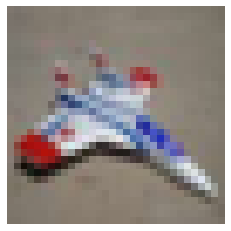



Class :  0  :  Airplane




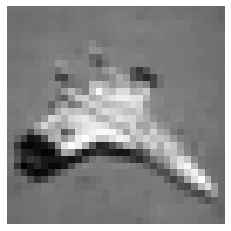

In [70]:
plot_img(30)

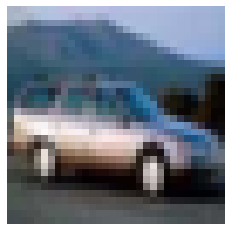



Class :  1  :  Automobile




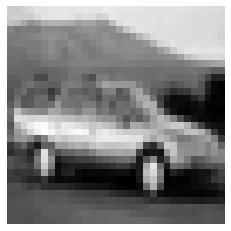

In [71]:
plot_img(4)

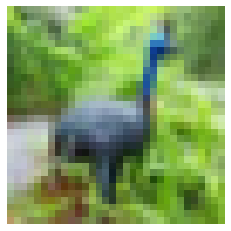



Class :  2  :  Bird




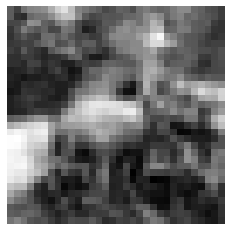

In [72]:
plot_img(6)

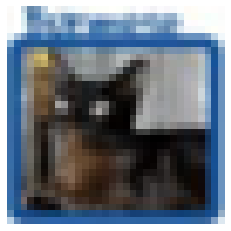



Class :  3  :  Cat




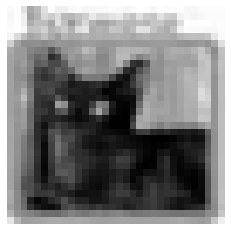

In [73]:
plot_img(59)

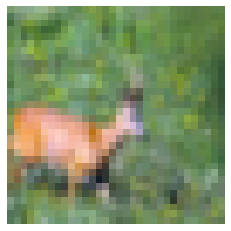



Class :  4  :  Deer




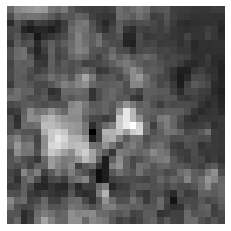

In [74]:
plot_img(82)

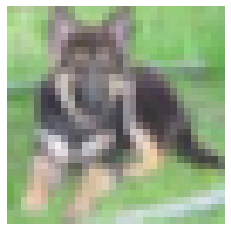



Class :  5  :  Dog




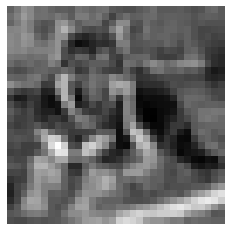

In [75]:
plot_img(156)

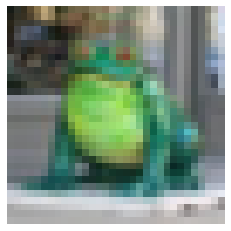



Class :  6  :  Frog




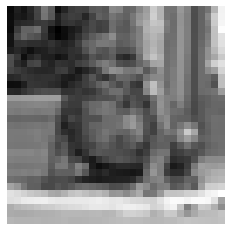

In [76]:
plot_img(19)

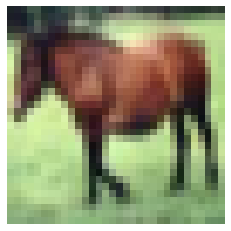



Class :  7  :  Horse




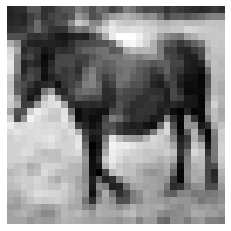

In [77]:
plot_img(7)

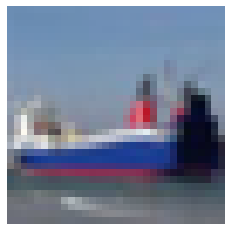



Class :  8  :  Ship




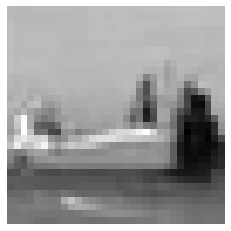

In [78]:
plot_img(106)

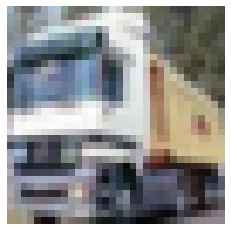



Class :  9  :  Truck




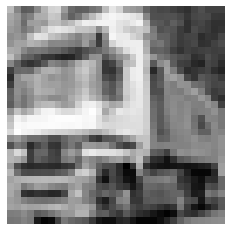

In [79]:
plot_img(1)